In [1]:
%matplotlib inline

import numpy as np
from utils.QAgent import *
from utils.localizationNet import *
import matplotlib.pyplot as py
from utils.Utils import generate_square as GS
import random
from model.model import MSE



sampling_grid=generate_sampling_grid()
square=GS(14,2) 

In [2]:
#transpose array 
identity= np.array([[1,0,0],[0,1,0],[0,0,1]]) 
affine1=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
affine2=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
mod=identity+affine1
resultant_affine=np.dot ((affine1+identity),(affine2+identity)) 
#print(resultant_affine)

affines =[]
affine1=np.array( [[0,0,0.5],[0,0,0],[0,0,0]]) #action 0 
affine2=np.array( [[0,0,0],[0,0,0.5],[0,0,0]]) #actinon1
affine3=np.array( [[0,0,-0.5],[0,0,0],[0,0,0]]) #action 2
affine4=np.array( [[0,0,0],[0,0,-0.5],[0,0,0]]) #actinon3
affines.append(affine1)
affines.append(affine2) 
affines.append(affine3) 
affines.append(affine4) 



#with four movements it'll be 1,1,3,3,1,1,
manipulation3 = np.ceil(affine_transformation(square,resultant_affine,sampling_grid)) #for data processing, all values are inputted using ceil. 
#py.imshow(manipulation3.reshape(28,28))
target=manipulation3 #This will be our target. 


#STEP1: Load up Q values and add most current state. Since we are looking at MSE it looks up only 1s
agent = Q_agent_base(starting_actions=4) 


current_state = np.array2string(square.flatten())

agent.add_state(current_state)
#load up MSE start state with real MSE: 
print('first MSE: ',MSE(target.flatten(),square.flatten()))
#agent.reward(current_state,0,MSE(target.flatten(),square.flatten()))
#agent.reward(current_state,1,MSE(target.flatten(),square.flatten()))

transformation=square
episilon = 1
#Trainign loop 


first MSE:  0.052295918367346934


epoch  0
action: 1


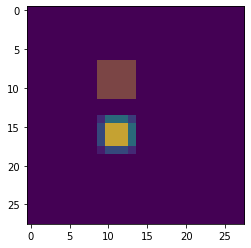

action: 1


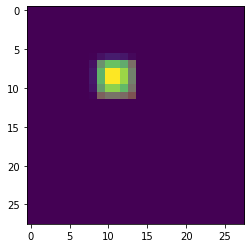

action: 1


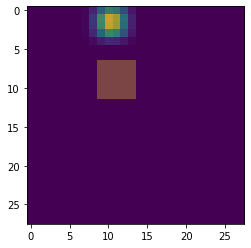

action: 3


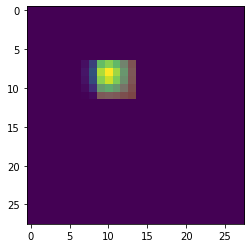

action: 0


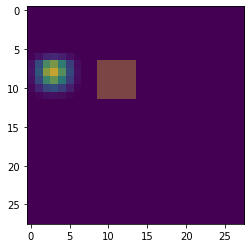

action: 2


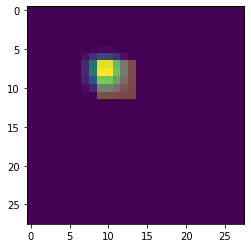

loss  0.02061239469721027
episilon: 0


In [7]:

test_mode=True

#print(agent.table())
for epochs in range(1): 
    print(f'epoch ', epochs)
    
    current_state = np.array2string(square.flatten()) #start from beginning
    transformation=square
    
    for steps in range(6): 
        #print('iteration')
        #Step 2: Randomize a value to perform a value. 
        if test_mode==False: 
            decision = random.uniform(0,1)
            
            if decision < episilon: 
                #do a random choice 
                #print('random choice')
                action=random.randint(0,agent.total_actions()-1) #will randomize actions.
            else: 
                #print('lowest_choice')
                action=agent.return_lowest_index (current_state) #lowest in this context is MSE.
        elif test_mode==True: 
            action=agent.return_lowest_index (current_state)

        print(f'action:', int(action))
        action=int(action)
        #Step 3: Perform the action (in this case it is a affine transformation)
        transformation= affine_transformation(transformation.reshape(28,28),identity+affines[action],sampling_grid)
        if test_mode==True:
            py.imshow(transformation.reshape(28,28))
            py.imshow(target.reshape(28,28),alpha=0.3)
            py.show()
        #step 4: Check if state exists. 
        next_state =np.array2string( np.ceil(transformation.flatten()))
        if (agent.search(next_state)==-1) : #if state does not exist. 
            agent.add_state(next_state)


        #Step 5: Check MSE to ensure that MSE has reduced. If it has then change the value 
        loss = MSE (target.flatten(), transformation.flatten() )
        if agent.return_Q(current_state,action) > loss: #if the loss is reduced. 
            #print('MSE lower')
            reward = agent.return_lowest(next_state) +loss#kind of like bellman eqn
            agent.reward(current_state,action,reward)
            #print(reward) 
            episilon-= 0.001
            if episilon <=0: 
                episilon=0
        else: 
            #print('MSE Higher')
            pass
            
        #print(agent.table())
        current_state=next_state
    print(f'loss ',loss)
    print(f'episilon:', episilon)
    #print(agent.table())

#print(f'lowest', agent.return_lowest(current_state))

#print(agent.table())

#print(agent.total_actions())
#test: 